In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time

In [2]:
def rungeKutta(f, to, yo, tEnd, tau):
         def increment(f, t, y, tau):# поиск приближённого решения методом Рунге—Кутта—Фельберга.
                  k1=tau*f(t,y)
                  k2=tau*f(t+(1/4)*tau,y+(1/4)*k1)
                  k3 =tau*f(t+(3/8)*tau,y+(3/32)*k1+(9/32)*k2)
                  k4=tau*f(t+(12/13)*tau,y+(1932/2197)*k1-(7200/2197)*k2+(7296/2197)*k3)
                  k5=tau*f(t+tau,y+(439/216)*k1-8*k2+(3680/513)*k3 -(845/4104)*k4)
                  k6=tau*f(t+(1/2)*tau,y-(8/27)*k1+2*k2-(3544/2565)*k3 +(1859/4104)*k4-(11/40)*k5)
                  return (16/135)*k1+(6656/12825)*k3+(28561/56430)*k4-(9/50)*k5+(2/55)*k6     
         t= []#подготовка пустого списка t
         y= []#подготовка пустого списка y
         t.append(to)#внесение в список t начального значения to
         y.append(yo)#внесение в список y начального значения yo
         while to < tEnd:#внесение результатов расчёта в массивы t,y
                  tau = min(tau, tEnd - to)#определение минимального шага tau
                  yo = yo + increment(f, to, yo, tau) # расчёт значения в точке t0,y0 для задачи Коши
                  to = to + tau # приращение времени
                  t.append(to) # заполнение массива t
                  y.append(yo) # заполнение массива y       
         return np.array(t), np.array(y)

def f(t, y): # функция правых частей системы ОДУ       
         f = np.zeros([4])
         f[0]=y[1]        
         f[1]=-Mc*G*y[0]/(y[0]**2+y[2]**2)**1.5     
         f[2]=y[3]
         f[3]=-Mc*G*y[2]/(y[0]**2+y[2]**2)**1.5  
         return f

(-4.5, 2.5)

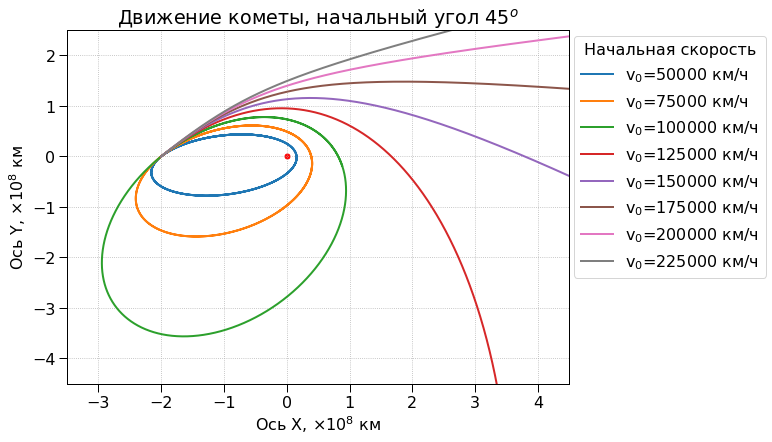

In [81]:
to = 0# начальный момент отсчёта времени в часах
tEnd = 20000 # конечный момент отсчёта времени
alph=np.pi/4# начальный угол движения кометы
v=range(50000,250000,25000) # начальная скорость в км/ч
G = 8.64 * 10**(-13)
Mc = 1.989 * 10**(30)

tau =1# шаг

matplotlib.rcParams.update({'font.size': 16, 'axes.linewidth':1, 'xtick.major.size':8,'xtick.major.width':1,
                            'ytick.major.size':8,'ytick.major.width':1,'xtick.labelsize':16, 'ytick.labelsize':16,
                            'axes.labelsize': 16})
plt.figure(figsize=(9.,6.5))


for v0 in v:
    yo = np.array([-200000000,v0*np.cos(alph),0.,v0*np.sin(alph)]) # начальные условия  
    t, y = rungeKutta(f, to, yo, tEnd, tau)
    y1=np.array([i[0] for i in y]) # извлечение переменных из массива y 
    y3=np.array([i[2] for i in y])
    plt.plot(y1/10**8,y3/10**8,'-',linewidth=2, label=r'v$_0$=%.f' % v0 + ' км/ч')

    
plt.plot(,linewidth=1,linestyle='--')
    
plt.scatter(0, 0, s=25, color='red')
plt.grid(b=True, which='major', axis='both',ls=':', zorder=1)
plt.legend(loc=[1.01,0.3],title='Начальная скорость')
plt.xlabel(r'Ось Х, $\times 10^8$ км')
plt.ylabel(r'Ось Y, $\times 10^8$ км')
plt.title(r'Движение кометы, начальный угол $45^o$')
plt.xlim(-3.5,4.5)
plt.ylim(-4.5,2.5)

(-0.25, 0.25)

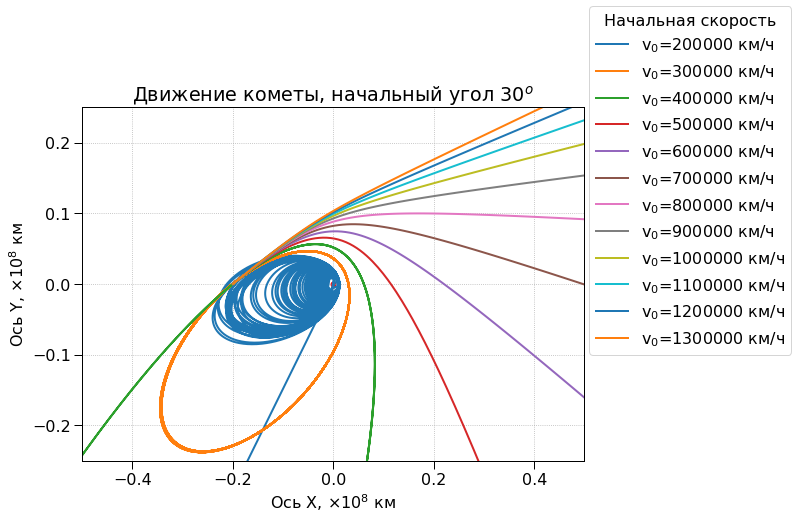

In [93]:
to = 0# начальный момент отсчёта времени в часах
tEnd = 20000 # конечный момент отсчёта времени
alph=np.pi/6# начальный угол движения кометы
v=range(200000,1400000,100000) # начальная скорость в км/ч
G = 8.64 * 10**(-13)
Mc = 1.989 * 10**(30)

tau =1# шаг

matplotlib.rcParams.update({'font.size': 16, 'axes.linewidth':1, 'xtick.major.size':8,'xtick.major.width':1,
                            'ytick.major.size':8,'ytick.major.width':1,'xtick.labelsize':16, 'ytick.labelsize':16,
                            'axes.labelsize': 16})
plt.figure(figsize=(9.,6.5))


for v0 in v:
    yo = np.array([-20000000,v0*np.cos(alph),0.,v0*np.sin(alph)]) # начальные условия  
    t, y = rungeKutta(f, to, yo, tEnd, tau)
    y1=np.array([i[0] for i in y]) # извлечение переменных из массива y 
    y3=np.array([i[2] for i in y])
    plt.plot(y1/10**8,y3/10**8,'-',linewidth=2, label=r'v$_0$=%.f' % v0 + ' км/ч')



plt.scatter(0, 0, s=25, color='red')
plt.grid(b=True, which='major', axis='both',ls=':', zorder=1)
plt.legend(loc=[1.01,0.3],title='Начальная скорость')
plt.xlabel(r'Ось Х, $\times 10^8$ км')
plt.ylabel(r'Ось Y, $\times 10^8$ км')
plt.title(r'Движение кометы, начальный угол $30^o$')
plt.xlim(-0.5,0.5)
plt.ylim(-0.25,0.25)

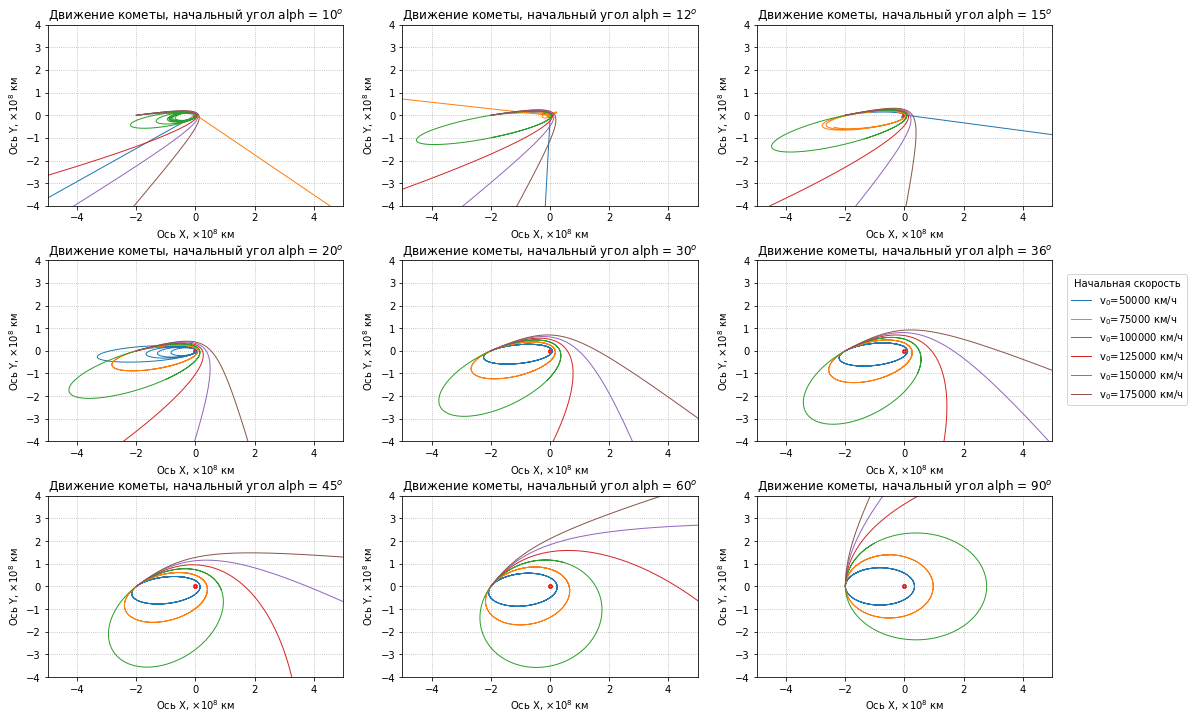

In [11]:
to = 0# начальный момент отсчёта времени в часах
tEnd = 20000 # конечный момент отсчёта времени
alph_array=[np.pi/18,np.pi/15,np.pi/12,np.pi/9,np.pi/6,np.pi/5,np.pi/4,np.pi/3,np.pi/2]# начальный угол движения кометы
v=range(50000,200000,25000) # начальная скорость в км/ч
G = 8.64 * 10**(-13)
Mc = 1.989 * 10**(30)

tau = 5# шаг

fig = plt.figure(figsize=(18.,12.))
fig.subplots_adjust(hspace=0.3, wspace=0.2)

for (i,alph) in zip(range(1,10), alph_array):
    ax = fig.add_subplot(3, 3, i)
    ax.scatter(0, 0, s=15, color='red')
    alph_o = alph*180./np.pi
    plt.title(r'Движение кометы, начальный угол ' + r'alph = %.f' % alph_o + r'$^o$')
    plt.ylim(-4,4)
    plt.xlim(-5,5)
    for v0 in v:
        yo = np.array([-200000000,v0*np.cos(alph),0.,v0*np.sin(alph)]) # начальные условия 
        t, y = rungeKutta(f, to, yo, tEnd, tau)
        y1=np.array([i[0] for i in y]) # извлечение переменных из массива y 
        y3=np.array([i[2] for i in y])
        ax.plot(y1/10**8,y3/10**8,'-',linewidth=1, label=r'v$_0$=%.f' % v0 + ' км/ч')
    
    plt.grid(b=True, which='major', axis='both',ls=':', zorder=1)
    plt.xlabel(r'Ось Х, $\times 10^8$ км')
    plt.ylabel(r'Ось Y, $\times 10^8$ км')
plt.legend(loc=[1.05,1.5],title='Начальная скорость')        
plt.show()